# Import data set

In [1]:
import pandas as pd

In [2]:
loan_df = pd.read_csv("./loan.csv")


In [3]:
# Loan_ID : Unique Loan ID

# Gender : Male/ Female
# Married : Applicant married (Y/N)
# Self_Employed : Self employed (Y/N)
# Education : Applicant Education (Graduate/ Under Graduate)
# Credit_History : Credit history meets guidelines yes or no
# Property_Area : Urban/ Semi Urban/ Rural

# Dependents : Number of dependents
# ApplicantIncome : Applicant income
# CoapplicantIncome : Coapplicant income
# LoanAmount : Loan amount in thousands of dollars
# Loan_Amount_Term : Term of loan in months

# Predict
# Loan_Status : Loan approved (Y/N) this is the target variable


### 1. Display Top 5 Rows of The Dataset

In [4]:
loan_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Check Last 5 Rows of The Dataset

In [5]:
loan_df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
loan_df.shape

(614, 13)

In [7]:
loan_df.shape[0]

614

### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [8]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 5. Check Null Values In The Dataset

In [9]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
(loan_df.isnull().sum() / len(loan_df)) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### 6. Handling The missing Values

In [11]:
# Task 1: Drop the Loan_ID              
# Task 2: Delete the the entire row if the missing data is < 5% in the column
# Task 3: Impute if > 5% missing rows
# Clue: drop, dropna subset, fillna

loan_df = loan_df.drop('Loan_ID', axis=1)

In [12]:
loan_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [13]:
columns = ["Gender", "Married", "Dependents", "LoanAmount", "Loan_Amount_Term"]


loan_df = loan_df.dropna(subset=columns)

In [14]:
(loan_df.isnull().sum() / len(loan_df)) * 100

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [15]:
loan_df['Credit_History'].unique()
loan_df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
loan_df['Credit_History'].value_counts()

Credit_History
1.0    434
0.0     71
Name: count, dtype: int64

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imputer = SimpleImputer(strategy="most_frequent")
columns_to_impute = ['Self_Employed', 'Credit_History']
loan_df[columns_to_impute] = imputer.fit_transform(loan_df[columns_to_impute])

In [19]:
(loan_df.isnull().sum() / len(loan_df)) * 100
# Cleaning - done

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

### 7. Handling Categorical Columns

In [20]:
# Convert to 0 1 2
# Task 4: Encoding columns 
# DataFrame - Encoding
loan_df['Education'].value_counts()

Education
Graduate        437
Not Graduate    116
Name: count, dtype: int64

In [21]:
# Gender : Male/ Female
# Married : Applicant married (Y/N)
# Self_Employed : Self employed (Y/N)
# Education : Applicant Education (Graduate/ Under Graduate)
# Credit_History : Credit history meets guidelines yes or no
# Property_Area : Urban/ Semi Urban/ Rural

# Dependents : Number of dependents

In [22]:
loan_df['Education'].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)

C:\Users\E1005238\AppData\Local\Temp\ipykernel_22944\2659005358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['Education'].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)
C:\Users\E1005238\AppData\Local\Temp\ipykernel_22944\2659005358.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [23]:
loan_df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
loan_df['Married'].replace({'Yes': 1, 'No': 0}, inplace=True)
loan_df['Self_Employed'].replace({'Yes': 1, 'No': 0}, inplace=True)
loan_df['Property_Area'].replace({ 'Urban': 2 ,'Semiurban': 1, 'Rural': 0}, inplace=True)
loan_df['Loan_Status'].replace({'Y': 1, 'N': 0}, inplace=True)

C:\Users\E1005238\AppData\Local\Temp\ipykernel_22944\1797237171.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
C:\Users\E1005238\AppData\Local\Temp\ipykernel_22944\1797237171.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lo

In [24]:
loan_df['Dependents'].replace({'3+': 4}, inplace=True)

C:\Users\E1005238\AppData\Local\Temp\ipykernel_22944\1111135431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['Dependents'].replace({'3+': 4}, inplace=True)


In [25]:
loan_df['Dependents'] = loan_df['Dependents'].astype('int')
loan_df['Credit_History'] = loan_df['Credit_History'].astype('int')
# Encoding done

In [26]:
loan_df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1,2,1


# Bar graph - Education vs Loan status  (Graduate?)
# Bar graph - Married vs Loan status (output)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
loan_df.groupby(['Education' ,'Loan_Status' ]).size()

Education  Loan_Status
0          0               40
           1               76
1          0              124
           1              313
dtype: int64

<Axes: xlabel='Education', ylabel='count'>

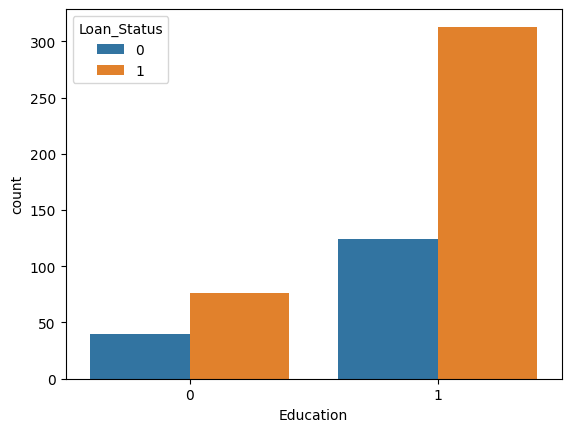

In [29]:
loan_df.groupby(['Education' ,'Loan_Status' ]).size()
# loan_df.groupby(['Education' ,'Loan_Status' ]).size().unstack()

# orginal_df =  pd.read_csv("./loan.csv")
sns.countplot(data=loan_df, x='Education', hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

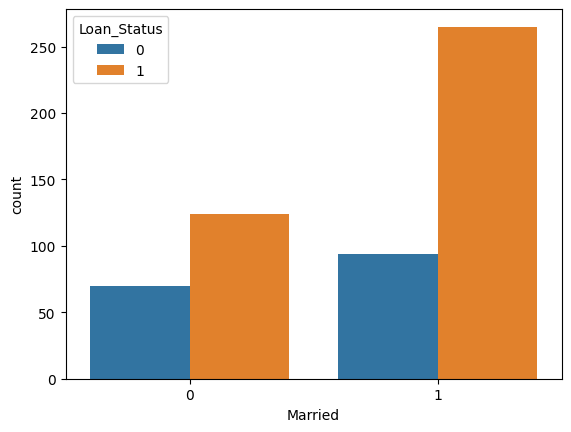

In [30]:
sns.countplot(data=loan_df, x='Married', hue='Loan_Status')

<Axes: >

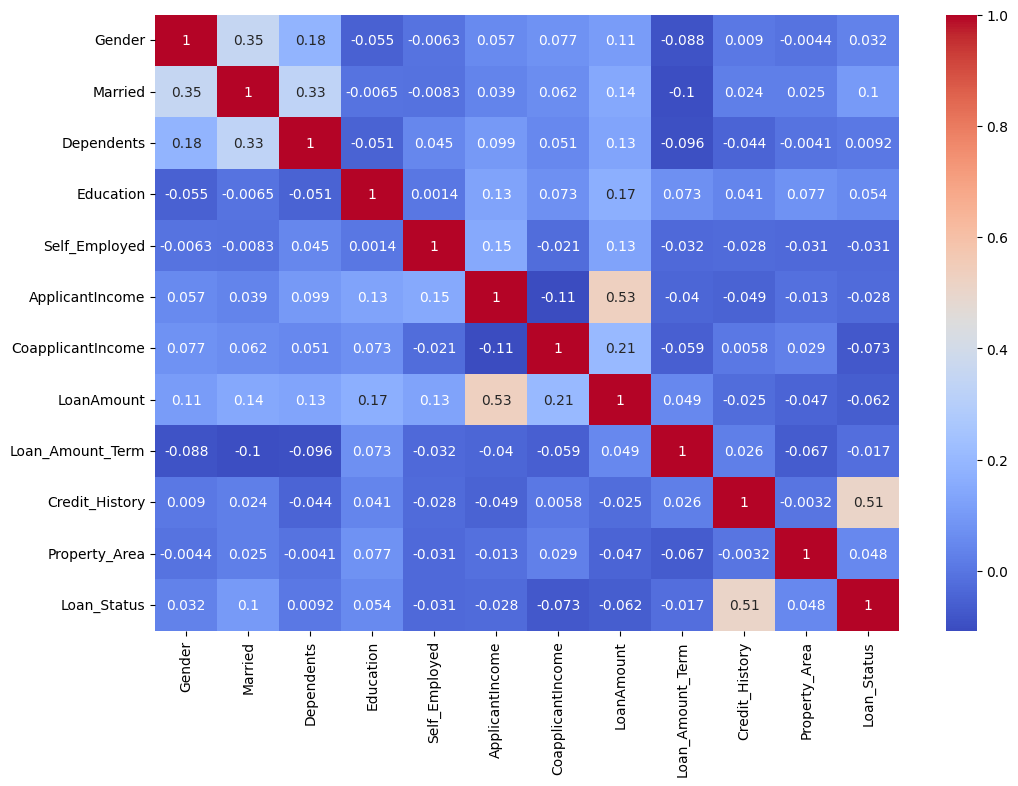

In [64]:
import matplotlib.pyplot as plt # type: ignore
correlatation_matrix = loan_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlatation_matrix, annot=True, cmap='coolwarm')

### 8. Store Feature In X And Response (Target)  y

In [31]:
features = loan_df.drop('Loan_Status', axis=1)

In [35]:
target_df = loan_df['Loan_Status']

### 9. Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [34]:
pd.DataFrame(features_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,0.481275,0.735112,0.127481,0.515215,-0.386896,-0.128694,-0.049699,-0.214368,0.279961,0.383801,-1.307359
1,0.481275,0.735112,-0.701896,0.515215,2.584677,-0.394296,-0.545638,-0.952675,0.279961,0.383801,1.251825
2,0.481275,0.735112,-0.701896,-1.940938,-0.386896,-0.464262,0.229842,-0.309634,0.279961,0.383801,1.251825
3,0.481275,-1.360337,-0.701896,0.515215,-0.386896,0.109057,-0.545638,-0.059562,0.279961,0.383801,1.251825
4,0.481275,0.735112,0.956858,0.515215,2.584677,0.011239,0.834309,1.440866,0.279961,0.383801,1.251825
...,...,...,...,...,...,...,...,...,...,...,...
548,-2.077813,-1.360337,-0.701896,0.515215,-0.386896,-0.411075,-0.545638,-0.893134,0.279961,0.383801,-1.307359
549,0.481275,0.735112,2.615613,0.515215,-0.386896,-0.208727,-0.545638,-1.262287,-2.468292,0.383801,-1.307359
550,0.481275,0.735112,0.127481,0.515215,-0.386896,0.456706,-0.466709,1.274152,0.279961,0.383801,1.251825
551,0.481275,0.735112,0.956858,0.515215,-0.386896,0.374659,-0.545638,0.488213,0.279961,0.383801,1.251825


### 10. Splitting The Dataset Into The Training Set And Test Set 

In [36]:
from sklearn.model_selection import train_test_split

# 1. split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_df, test_size=0.2, random_state=42)

In [38]:
print(X_train.shape, X_test.shape)

(442, 11) (111, 11)


### 11. Logistic Regression

In [51]:
# from sklearn.linear_model import LogisticRegression # type: ignore

# model = LogisticRegression() #  2. choose model
# model.fit(X_train, y_train) # 3. train

# predict = model.predict(X_test) # 4. predict
# predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1], dtype=int64)

In [61]:
from sklearn.ensemble import RandomForestClassifier

# 2. Choose the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42) 

# 3. Train the model
model.fit(X_train, y_train)

# 4. Predict
predict = model.predict(X_test)
predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1], dtype=int64)

In [59]:
y_test # 5. actual output - metrics

609    1
92     1
580    1
373    0
151    1
      ..
159    1
169    1
553    0
174    0
194    1
Name: Loan_Status, Length: 111, dtype: int64

In [60]:
from sklearn.metrics import accuracy_score
 
accuracy = accuracy_score(y_test, predict)
print(f"Model accuracy: {accuracy:.2%}")

Model accuracy: 77.48%
